# Chapter 2 - The Vector

Summary:
- Vector definition and notation: n-vector over R, n-vector over F, a D-vector over F
- Vector representation using `dict` in Python
- Vector operations: vector addition, scalar-vector multiplication and their property
- Convex and affine combination for vector to form line segment and infinite lines
- Vector dot-product, and its properties: commutativity, homogeneity
- Linear equation, linear system.

A few problems associated with future chapters:
- "Light out" problem solution
- Solving a linear system
- Parity bit, checksum functions and function to locate an error
- matrix-vector multiplication to solve filtering with kernel
- Algorithm to quickly compute all dot-products

# Reference

Quaternions is a system of mathematical notation used to represent rotations and orientations in three-dimensional space, 
it was invented by William Rowan Hamilton, a prodigy.

Josiah Gibbs, made significant contributions to the fields of thermodynamics, statistical mechanics, 
and physical chemistry. He developed vector analysis as an alternative to quaternions.

### Definition 2.1.1
A vector with four entries, each of which is a real number, is called a 4-vector over $\mathbb{R}$
All the elements of a vector must from one field.

### Definition 2.1.2
For a field $\mathbb{F}$ and a positive integer n, a vector with n entries, each belonging to $\mathbb{F}$, is called an n-vector over $\mathbb{F}$. The set of n-vectors over F is denoted $\mathbb{F}^n$.

Vector could be interpreted as function which maps ${0, 1, 2 ..., d-1}$ to $\mathbb{F}$.

### Definition
multiset, or bag, is a set which could contain more than one copy of a element.

### Definition 2.2.2 (CS definition)
For __a finite set D__ and a field $\mathbb{F}$, a D-vector over $\mathbb{F}$ __is a function__ from D to $\mathbb{F}$.

Example, document vector could be defined as, $f: WORDS \rightarrow \mathbb{R}$

With this definition, $\mathbb{F}^D$ denotes the set of all D-vectors over $\mathbb{F}$ 

In [1]:
import math

from plot import plot_points as plot

In [2]:
# vector is a function with finite domain, it could be represented as dict
# zero values would be omittied in the sparse representation
words_vector = {'on': 1, 'Spain': 1, 'in': 1, 'plain': 1, 'the': 2, 'mainly': 1, 'rain': 1, 'falls': 1}

# n-vector with N as its domain (1, 2, ...), could be represented as list
n_vector = [3.1415, 2.7192, -1.0, 2.0]

# Both list and dict represents vector in its sparse form.

# k-sparse, vector where k entries are nonzero.

# Interesting problems:
# - Find "closest" k-sparse vector, used in compression schemes
# - Sparse matrix representation

In [3]:
# representation in vector

# binary string represented by GF(2)^n
"10111011" # => [one, zero, one, ...]

# Attributes. Each data set is a collection of {attr_name => attr_value ...}. 
# The collection is represented as vector.
Jane = {'age':30, 'education level':16, 'income':85000}

# State of system, country_name => population
world = {'China':1341670000, 'India':1192570000, 'US':308745538, 'Indonesia':237556363, 'Brazil':190732694}

# Probability distribution, event => real_number
{1:1/6, 2:1/6, 3:1/6, 4:1/6, 5:1/6, 6:1/6}

# Image, coordinates pair => RGB color

# Point in space, N => Coordinates, it could represent high-dimension points as well
L = [[2, 2], [3, 2], [1.75, 1], [2, 1], [2.25, 1], [2.5, 1], [2.75, 1], [3, 1], [3.25, 1]]

## 2.4 Vector addition


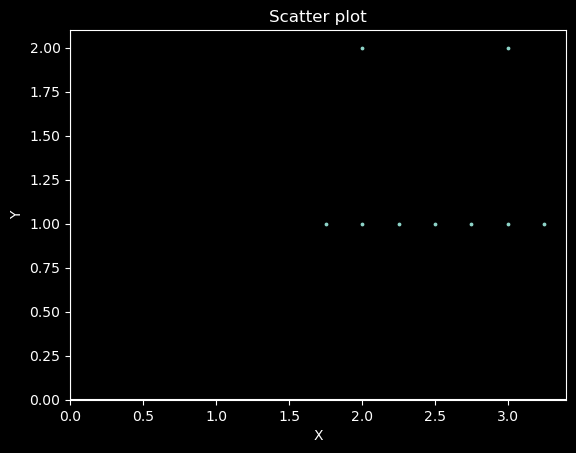

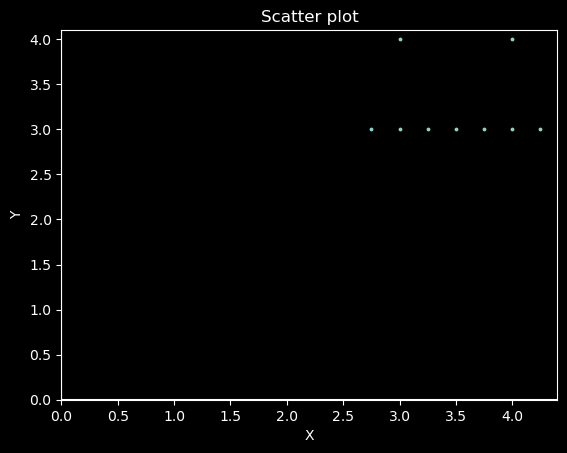

In [4]:
# Definition 2.4.1: Addition of n-vectors is defined in terms of addition of corresponding entries:
def add2(v, w):
    return [v[0]+w[0], v[1]+w[1]]

plot(L, 3)
plot([add2(v, [1, 2]) for v in L], 3)

In [5]:
def addn(v, w):
    return [v[i] + w[i] for i in range(len(v))]

# Definition, zero-vector in F^D is a vector with all D entries zero.
def make_zero(v):
    if isinstance(v, int):
        return 0
    if isinstance(v, float):
        return 0.0
    if isinstance(v, list):
        return [make_zero(e) for e in v]
    if isinstance(v, tuple):
        return tuple([make_zero(e) for e in v])

def zeroes(v): 
    zero = make_zero(v[0])
    return [zero for d in v]
zeroes(L)

# Proposition 2.4.5 (Associativity and Commutativity of Vector Addition)
assert addn(L[0], L[1]) == addn(L[1], L[0])
assert addn(addn(L[0], L[1]), L[3]) == addn(L[0], addn(L[1], L[3]))

In [6]:
# Vector could be seen as arrows and addition could be seen as composition in connecting two arrows.

In [7]:
# Definition 2.5.1: Multiplying a vector v by a scalar α is defined as multiplying each entry of v by α:
def scalar_vector_mult(alpha, v):
    return [alpha*v[i] for i in range(len(v))]

# Proposition 2.5.5 (Associativity of scalar-vector multiplication):
alpha = math.pi
beta = math.e
assert scalar_vector_mult(beta, scalar_vector_mult(alpha, L[0])) == scalar_vector_mult(alpha, scalar_vector_mult(beta, L[0]))

# plot(scalar_vector_mult(0.5, v) for v in L)
# plot(scalar_vector_mult(-0.5, v) for v in L)

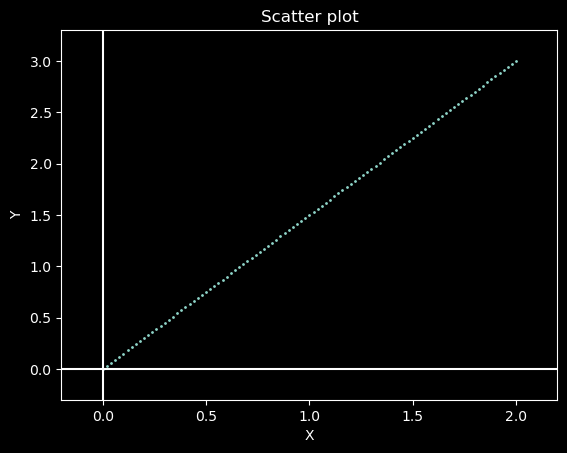

In [8]:
# Using alpha between [0, 1], it would represent the line segments from origin to the point v
# Line segments through the origin
v = [2, 3]
plot([scalar_vector_mult(i/100, v) for i in range(101)], 1)

# Using alpha in all R, it represent the inifinte line through origin and v 

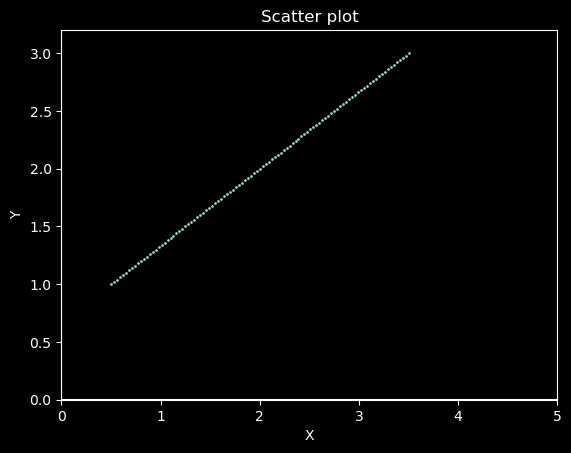

In [9]:
# Using addition, we could plot lines not through origin as well
plot([add2(scalar_vector_mult(i/100.0, [3,2]), [0.5,1]) for i in range(101)], 1, 5)

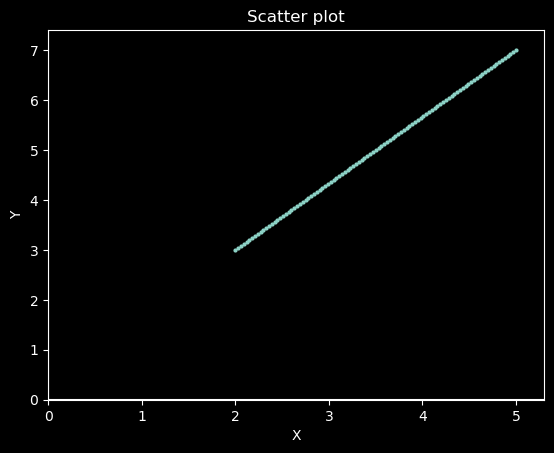

In [10]:
# Exercise 2.6.1
w = [3, 4]
# alpha[3, 4] + [2, 3], for alpha in R
plot([add2(scalar_vector_mult(i/100.0, [3, 4]), [2, 3]) for i in range(101)], 4)

# Exercise 2.6.2
# alpha[5, -1] + [1, 4], for alpha in R

In [11]:
# Proposition 2.6.3 (Scalar-vector multiplication distributes over vector addition)
assert scalar_vector_mult(3, addn(L[0], L[1])) == addn(scalar_vector_mult(3, L[0]), scalar_vector_mult(3, L[1]))

# Proposition 2.6.5 (scalar-vector multiplication distributes over scalar addition):
a = 42
b = 1961
assert scalar_vector_mult(a + b, L[0]) == addn(scalar_vector_mult(a, L[0]), scalar_vector_mult(b, L[0]))

# NOTE: both property here assumes property of + and * in the scalar's domain.

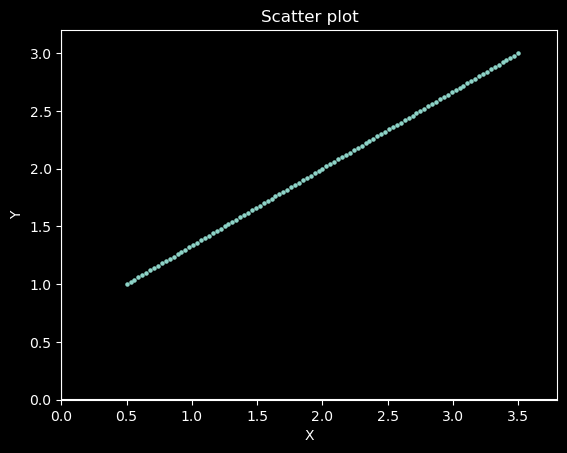

In [12]:
# Definition: An expression of the form αu+βv where α,β ≥ 0 and α+β = 1 is called __a convex combination__ of u and v.
# Proposition 2.6.7: The u-to-v line segment consists of the set of convex combinations of u and v.

def segment(pt1, pt2, n=100):
    n = float(n)
    return [addn(scalar_vector_mult(i/n, pt1),
          scalar_vector_mult(1.0 - i/n, pt2)) for i in range(101)]

plot(segment([3.5, 3], [0.5, 1]))

In [13]:
# Definition: An expression of the form αu+βv where α+β = 1 is called __an affine combination__ of u and v.
# Convex combination is a special form of affine combination.

# Q: The term "affine" and "convex" names come from the fact that these combinations preserve the affine or convext 
# structure of the space. 

# Hypothesis 2.6.11: The line through u and v consists of the set of affine combinations of u and v.

In [14]:
# Vector Implementation
class Vec:
    def __init__(self, labels, function):
        # Domain is immutable
        self.D = tuple(labels)
        self.f = function

    def __setitem__(self, d, v):
        self.f[d] = v

    def __getitem__(self, d):
        if d in self.f:
            return self.f[d]
        else:
            return 0
    
    def zeroes(self):
        return Vec(self.D, {})

    def scalar_mul(self, alpha):
        return Vec(self.D, {d: alpha * self[d] for d in self.D})

    def add(self, other):
        assert self.D == other.D
        assert isinstance(other, Vec)
        return Vec(self.D, {d: other[d] + self[d] for d in self.D})

    def neg(self):
        return Vec(self.D, {d: -self[d] for d in self.D})

    def dot(self, v):
        u = self
        assert u.D == v.D
        return sum(u[d] * v[d] for d in u.D)

    def k_sparse(self):
        """Returns the number of values defined in the sparse space."""
        return len(self.f.values())

    # Python magic
    __add__ = add
    __neg__ = neg

    def __sub__(self, other):
        return self.add(-other)

    def __mul__(self, rh):
        if isinstance(rh, int) or isinstance(rh, float):
            return self.scalar_mul(rh)
        elif isinstance(rh, Vec):
            return self.dot(rh)
        else:
            print(f"unknow type: {type(rh)}")
            pass

    def __rmul__(self, lh):
        if isinstance(lh, int) or isinstance(lh, float):
            return self.scalar_mul(lh)
        elif isinstance(lh, Vec):
            return self.dot(lh)
        else:
            print(f"unknow type: {type(lh)}")
            pass

    def __repr__(self):
        return f"Vec[f={self.f}, D={self.D}]"
    
    def __eq__(self, other):
        return (self.D == other.D) and self.f == other.f

v = Vec({'A', 'B', 'C'}, {'A': 1})
v['B'] = 3
[
    v['B'], v['A'], v['C'],
    v * 3,
    3 * v,
    v + v,
    -v,
    v == v,
    v == Vec({'A', 'B', 'C'}, {'A': 2}),
    v == Vec({'A', 'B'}, {'A': 1}),
]

[3,
 1,
 0,
 Vec[f={'B': 9, 'A': 3, 'C': 0}, D=('B', 'A', 'C')],
 Vec[f={'B': 9, 'A': 3, 'C': 0}, D=('B', 'A', 'C')],
 Vec[f={'B': 6, 'A': 2, 'C': 0}, D=('B', 'A', 'C')],
 Vec[f={'B': -3, 'A': -1, 'C': 0}, D=('B', 'A', 'C')],
 True,
 False,
 False]

## 2.8 Vectors over GF(2)

In [15]:
from book.GF2 import one, zero

def gf2_vector(s):
    """Accepts binary string or list for GF(2) vector."""
    if isinstance(s, list):
       s = ''.join([str(e) for e in s]) 
    f = dict(enumerate([one if ch == '1' else zero for ch in list(s)]))
    return Vec(
        list(f.keys()), # D is [0, 1, 2, ...]
        f)

v1 = gf2_vector("1101")
v2 = gf2_vector("0111")
v1 + v2

Vec[f={0: one, 1: 0, 2: one, 3: 0}, D=(0, 1, 2, 3)]

In [16]:
# one-time pad encoding revisited
k = gf2_vector([0,1,1,0,1,0,0,0,0,1])
p = gf2_vector([0,0,0,1,1,1,0,1,0,1])
c = p + k
# recover the original k
assert p == c + k
assert c - k == c + k

In [17]:
# Application: All-or-nothing secret-sharing 
import random

def random_bit():
    return 1 if random.uniform(0, 1) > 0.5 else 0

def all_or_nothing(message):
    v_a = gf2_vector([random_bit() for i in range(message.k_sparse())])
    v_b = message - v_a
    return v_a, v_b

message = gf2_vector([0,1,1,0,1,0,0,0,0,1])
v_a, v_b = all_or_nothing(message)
assert v_b + v_a == message

In [18]:
# Problem 2.8.3, share n-bit secret among 3 TAs, any two learns nothing
# Solution, recursively applying the process above

message = gf2_vector([0,1,1,0,1,0,0,0,0,1])
v_a, m2 = all_or_nothing(message)
v_b, v_c = all_or_nothing(m2)
assert v_a + v_b + v_c == message

In [19]:
# Computational Problem 2.8.4: Solving Lights Out:
# Given an initial configuration of lights, find a sequence of button-pushes that turns out all the lights, or report that none exists.
# Question 2.8.5: Is there a way to solve the puzzle for every possible starting configuration?
# Or for n dimensions

# (int, int) => GF(2)
state = {(0, 0): one, (0, 1): one, (0, 2): one, (0, 3): one, (0, 4): 0,
         (1, 0): one, (1, 1): one, (1, 2): one, (1, 3): 0,   (1, 4): one,
         (2, 0): one, (2, 1): one, (2, 2): one, (2, 3): 0,   (2, 4): one,
         (3, 0): 0,   (3, 1): 0,   (3, 2): 0,   (3, 3): one, (3, 4): one,
         (4, 0): one, (4, 1): one, (4, 2): 0,   (4, 3): one, (4, 4): one}

 # move is a vector at any position
def move(coord):
    return {(0,0):one, (0,1):one, (1,0):one}

# the s + m1 + m2 + ... mn = zeroes => m1 + m2 + ... + mn = s

# The problem becomes its general form!!
# Computational Problem 2.8.7: Representing a given vector as a sum of a subset of other given vectors over GF(2)

## 2.9 Dot-product and Linear System

In [20]:
# also called scalar product

def dot_product(u, v):
    assert u.D == v.D
    return sum(u[d] * v[d] for d in u.D)

def list_dot(u, v):
    return sum(u[d] * v[d] for d in range(len(u)))

def to_vector(l):
    """Accepts binary string or list for GF(2) vector."""
    f = dict(enumerate(l))
    return Vec(
        list(f.keys()), # D is [0, 1, 2, ...]
        f)

u = [1, 1, 1, 1, 1]
u = to_vector(u)
v = [10, 20, 0, 40, -100]
v = to_vector(v)
dot_product(u, v)

-30

In [21]:
# Linear equations
# Definition 2.9.6: A linear equation is an equation of the form a · x = β, where a is a vector, β is a scalar, and x is a __vector variable__.

D = {'memory', 'radio', 'sensor', 'CPU'}
rate = Vec(D, {'memory':0.06, 'radio':0.1, 'sensor':0.004, 'CPU':0.0025})
duration = Vec(D, {'memory':1.0, 'radio':0.2, 'sensor':0.5, 'CPU':1.0})
rate.dot(duration)

# given a duration and consumption fixed, could we find the rate
# Definition 2.9.10: In general, a system of linear equations is a collection of linear equations, (often abbreviated linear system)

# Question 2.9.11: Uniqueness of solution to a linear system

# Computational Problem 2.9.12: Solving a linear system
# - input: a list of vectors a1, . . . , am, and corresponding scalars β1, . . . , βm (the right-hand sides)
# - output: a vector xˆ satisfying the linear system 2.3 or a report that none exists.

0.08449999999999999

In [22]:
# Application: dot product can be used to measure similarity 

# Fun fact, why 44100Hz in sampling?
# The highest frequency that humans can hear is typically around 20,000 Hz; based on the Nyquist-Shannon sampling theorem which states 
# that in order to accurately reconstruct a continuous signal from its samples, the sampling rate must be at least twice the highest 
# frequency present in the signal. 44100 is common used in early digial audio equipment.

# How measure two audio segments?
haystack = [1, -1, 1, 1, 1, -1, 1, 1, 1] 
needle = [1, -1, 1, 1, -1, 1]
[
    list_dot(needle,
                 haystack[i:i+len(needle)])
    for i in range(len(haystack) - len(needle) + 1)
]

# This could be seen as a __linear filter__
# Another way is pad the needle to be the same length of the haystack and apply the product

[2, 2, 0, 0]

In [23]:
# Application: parity bit
# Capture errors during bits transmission

# Challenge-response scheme
# Instead of sending password directly, generate a challenge, which could only be solved with procession of original password

# Question 2.9.18: Number of solutions to a linear system over GF(2) How many solutions are there to a given linear system over GF (2)?

# Computational Problem 2.9.19: Computing all solutions to a linear system over GF(2) 
#                               Find all solutions to a given linear system over GF (2).

# Question 2.9.20: Does a system of linear equations imply any other linear equations? 
#                  If so, what other linear equations?

In [24]:
# dot product property

# Proposition 2.9.21 (Commutativity of dot-product): u · v = v · u
u = to_vector([1, 1, 1, 1, 1])
v = to_vector([10, 20, 0, 40, -100])
assert u.dot(v) == v.dot(u)

# Proposition 2.9.22 (Homogeneity of dot-product): (α u) · v = α (u · v)
alpha = 42
assert (alpha * u).dot(v) == alpha * u.dot(v)

# Proposition 2.9.25 (Dot-product distributes over vector addition): (u + v) · w = u·w+v·w
w = to_vector([2, 4, 6, 8, 10])
assert (u + v).dot(w) == u.dot(w) + v.dot(w)

In [25]:
# 2.11 Solve triangular system
def triangular_solve_n(row_list, b):
    vlen = row_list[0].k_sparse()
    x = row_list[0].zeroes()
    for j, v in enumerate(reversed(row_list)):
        i = (vlen - 1) - j
        x[i] = (b[i] - x * v) / v[i]  # NOTE: v[i] != 0
    return x
    
triangle1 = [
    to_vector([1, 0.5, -2, 4]),
    to_vector([0, 3, 3 ,2]),
    to_vector([0, 0, 1, 5]),
    to_vector([0, 0, 0, 2]),
]
triangle2 = [
    to_vector([2, 3, -4]),
    to_vector([0, 1, 2]),
    to_vector([0, 0, 5]),
]

[
    triangular_solve_n(triangle1, [-8, 3, -4, 6]),
    triangular_solve_n(triangle2, [10, 3, 15]),
]

# Answer to linear system questions: is it unique, is it a solution?

# Proposition 2.11.5: For a triangular system specified by a length-n list rowlist of n-vectors and an n-vector b, 
# if rowlist[i][i] ̸= 0 for i = 0,1,...,n − 1 then the solution found by triangular_solve_n(rowlist, b) 
# is the only solution to the system.

# Proposition 2.11.6: For a length-n list rowlist of n-vector, if rowlist[i][i] = 0 for some integer i 
# then there is a vector b for which the triangular system has no solution.

[Vec[f={3: 3.0, 2: -19.0, 1: 18.0, 0: -67.0}, D=(0, 1, 2, 3)],
 Vec[f={2: 3.0, 1: -3.0, 0: 15.5}, D=(0, 1, 2)]]

In [26]:
# Extend the solver to other domain, (F^n -> F^D)

def triangular_solve(row_list, label_list, b):
    D = row_list[0].D
    x = row_list[0].zeroes)
    for j in reversed(range(len(D))):
        c = label_list[j]
        row = row_list[j]
        x[c] = (b[j] - x * row) / row[c]
    return x

label_list = ['a','b','c','d']
D = set(label_list)
rowlist=[Vec(D,{'a':4, 'b':-2,'c':0.5,'d':1}), Vec(D,{'b':2,'c':3,'d':3}),
               Vec(D,{'c':5, 'd':1}), Vec(D,{'d':2.})]
b = [6, -4, 3, -8]
triangular_solve(rowlist, label_list, b)

SyntaxError: unmatched ')' (1106586862.py, line 5)